## installing citipy

In [1]:
!pip install citipy

## Import libraries

In [2]:
# Import libraries

import os
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress
from datetime import datetime


# Import citipy module to determine the cities based on latitude and longitude
from citipy import citipy

#Empty list to store the latitude and longitude combinations
lat_lngs = []

# Empty list to store the names of cities
cities = []

# Define the range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate a set of random latitude and longitude combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# relate nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, add it to our list of cities using append method

    if city not in cities:
        cities.append(city)

# Print the cities
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


In [3]:
# Set the API base URL
weather_api_key = "75819173ce7d7174a9bf31f42a43abcf"
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid={}".format(weather_api_key)

# Define an empty list to fetch the weather data for each city
city_weather_data = []


# Create counters
record_count = 1
set_count = 1

In [4]:
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()

        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_weather_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass  ## general purpose statement to handle all errors and continue


Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | karakocan
Processing Record 4 of Set 1 | shimo-furano
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | valdivia
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | nogliki
Processing Record 12 of Set 1 | isafjordur
Processing Record 13 of Set 1 | kirakira
Processing Record 14 of Set 1 | castillos
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | qaqortoq
Processing Record 17 of Set 1 | arkhangel'sk
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | macapa
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | ahau
City not found. Skipping...
Processing Record 22 of Set 1 | port-aux-francais
Processing Record 

Processing Record 38 of Set 4 | shingu
Processing Record 39 of Set 4 | hurricane
Processing Record 40 of Set 4 | east london
Processing Record 41 of Set 4 | yingkou
Processing Record 42 of Set 4 | taltal
Processing Record 43 of Set 4 | nova vicosa
Processing Record 44 of Set 4 | keflavik
Processing Record 45 of Set 4 | etampes
Processing Record 46 of Set 4 | fale old settlement
Processing Record 47 of Set 4 | fuvahmulah
City not found. Skipping...
Processing Record 48 of Set 4 | obock
Processing Record 49 of Set 4 | punta arenas
Processing Record 0 of Set 5 | kapa'a
Processing Record 1 of Set 5 | chul'man
Processing Record 2 of Set 5 | alice springs
Processing Record 3 of Set 5 | trostyanets'
Processing Record 4 of Set 5 | ciudad melchor muzquiz
Processing Record 5 of Set 5 | alaghsas
Processing Record 6 of Set 5 | port lincoln
Processing Record 7 of Set 5 | mirpur bhtoro
Processing Record 8 of Set 5 | bac lieu
Processing Record 9 of Set 5 | ola
Processing Record 10 of Set 5 | belabo
P

Processing Record 30 of Set 8 | sao lourenco do sul
Processing Record 31 of Set 8 | yaren
Processing Record 32 of Set 8 | at taj
Processing Record 33 of Set 8 | nelson bay
Processing Record 34 of Set 8 | suva
Processing Record 35 of Set 8 | cumaribo
City not found. Skipping...
Processing Record 36 of Set 8 | key west
Processing Record 37 of Set 8 | saudarkrokur
Processing Record 38 of Set 8 | paracuru
Processing Record 39 of Set 8 | aranda de duero
Processing Record 40 of Set 8 | st. john's
Processing Record 41 of Set 8 | rio grande
Processing Record 42 of Set 8 | constantia
Processing Record 43 of Set 8 | farasan
Processing Record 44 of Set 8 | jidong
Processing Record 45 of Set 8 | tervel
Processing Record 46 of Set 8 | howard springs
Processing Record 47 of Set 8 | pisco
Processing Record 48 of Set 8 | hithadhoo
Processing Record 49 of Set 8 | dhidhdhoo
Processing Record 0 of Set 9 | morehead city
Processing Record 1 of Set 9 | santa cruz
Processing Record 2 of Set 9 | kaduy
Process

Processing Record 21 of Set 12 | roye
Processing Record 22 of Set 12 | erenhot
Processing Record 23 of Set 12 | gamba
Processing Record 24 of Set 12 | beibei
Processing Record 25 of Set 12 | embi
Processing Record 26 of Set 12 | constitucion
Processing Record 27 of Set 12 | whistler
Processing Record 28 of Set 12 | khadan khak
Processing Record 29 of Set 12 | nyurba
Processing Record 30 of Set 12 | sosnovo-ozerskoye
Processing Record 31 of Set 12 | pacocha


In [5]:
# Convert the cities weather data into a Pandas DataFrame
data = pd.DataFrame(city_weather_data)
# Counting the number of non-null values in each column of the DataFrame
data.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [6]:
data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,13.64,69,60,2.84,NZ,2023-11-25 20:12:30
1,adamstown,-25.0660,-130.1015,21.85,82,100,10.47,PN,2023-11-25 20:12:32
2,karakocan,38.9558,40.0386,6.51,92,100,2.12,TR,2023-11-25 20:12:34
3,shimo-furano,43.3500,142.3833,-4.87,94,100,3.57,JP,2023-11-25 20:09:45
4,ushuaia,-54.8000,-68.3000,8.40,78,86,4.20,AR,2023-11-25 20:12:34


In [7]:
 # Creating plots
def plot_and_regression(x, y, title, xlabel, ylabel):
        plt.scatter(x, y, label="Cities")
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        line = slope * x + intercept
        plt.plot(x, line, color='red', label='Linear Regression')
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.legend()
        plt.show()
        print(f"R-squared: {r_value**2}")

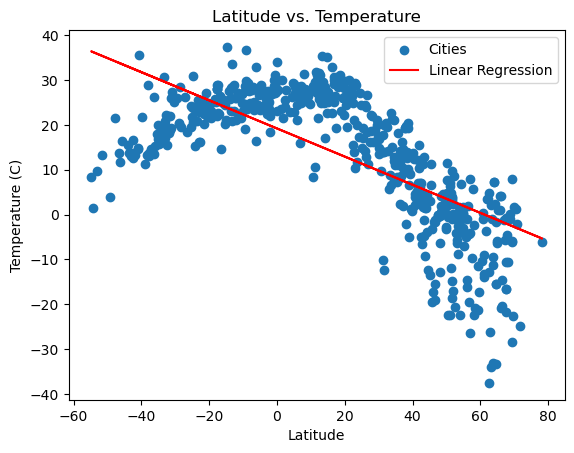

R-squared: 0.4744907958583185


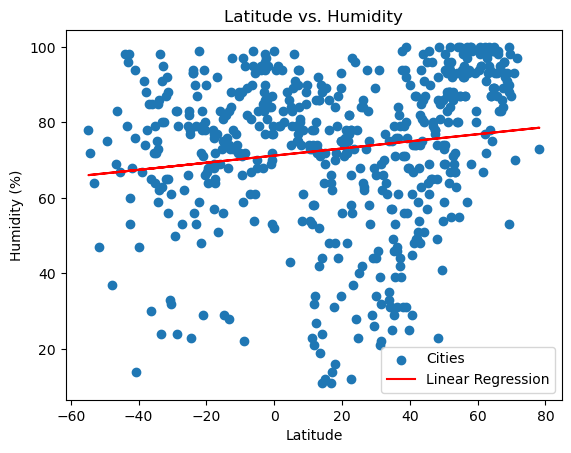

R-squared: 0.022530712985014488


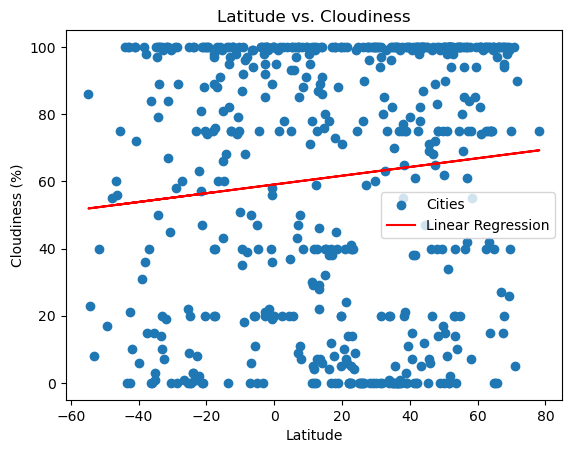

R-squared: 0.01173328958270278


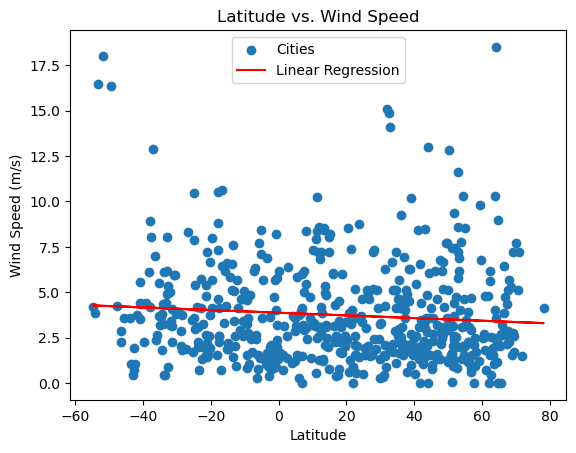

R-squared: 0.007279643618428823


In [8]:
# Scatter plots to visualize the relationship between weather factors and this?


# Latitude vs temperature
plot_and_regression(data["Lat"], data["Max Temp"], "Latitude vs. Temperature", "Latitude", "Temperature (C)")

# Latitude vs humidity
plot_and_regression(data["Lat"], data["Humidity"], "Latitude vs. Humidity", "Latitude", "Humidity (%)")

# Latitude vs Cloudiness
plot_and_regression(data["Lat"], data["Cloudiness"], "Latitude vs. Cloudiness", "Latitude", "Cloudiness (%)")

# Plot Latitude vs Wind Speed
plot_and_regression(data["Lat"], data["Wind Speed"], "Latitude vs. Wind Speed", "Latitude", "Wind Speed (m/s)")

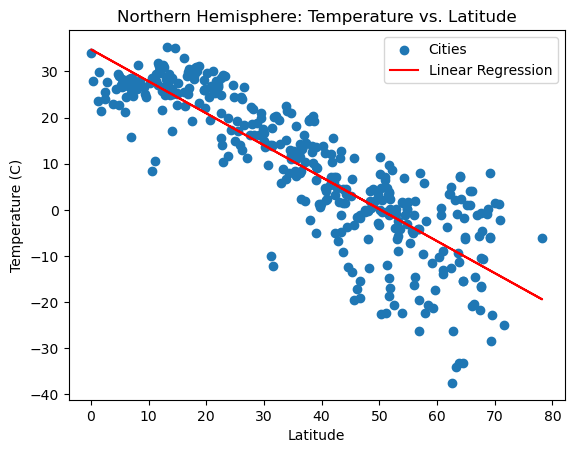

R-squared: 0.7257353953807252


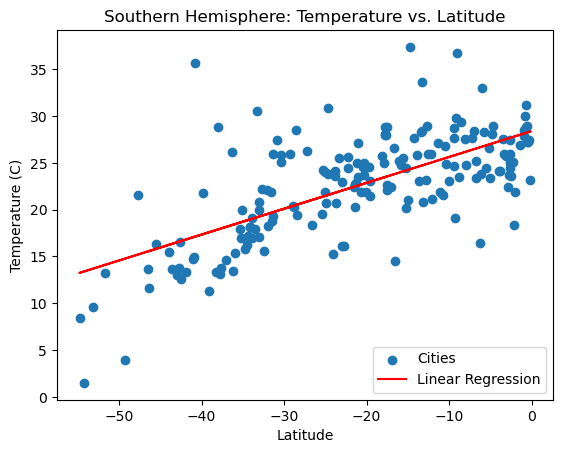

R-squared: 0.45354676294289786


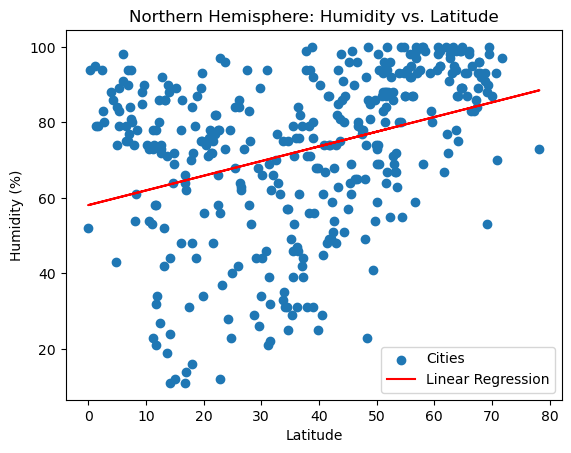

R-squared: 0.12120998627856888


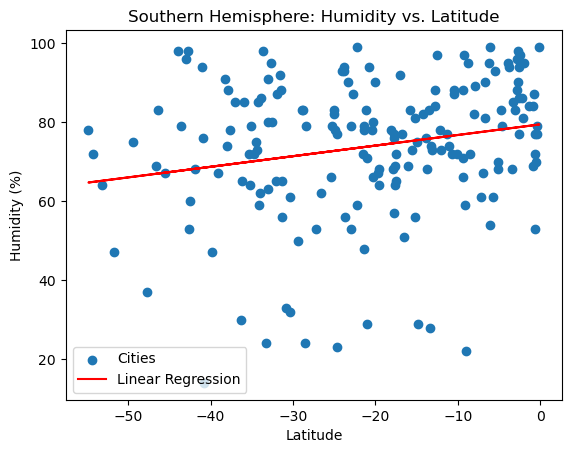

R-squared: 0.04555247472111652


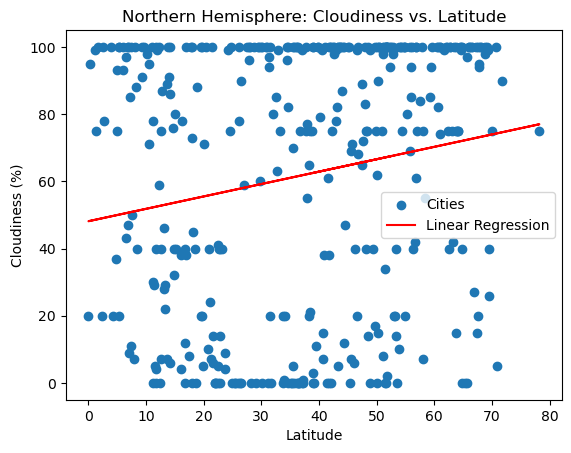

R-squared: 0.032644236085459015


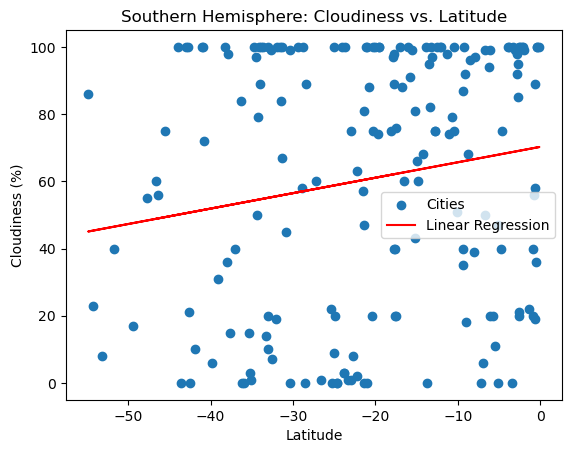

R-squared: 0.02872426374366923


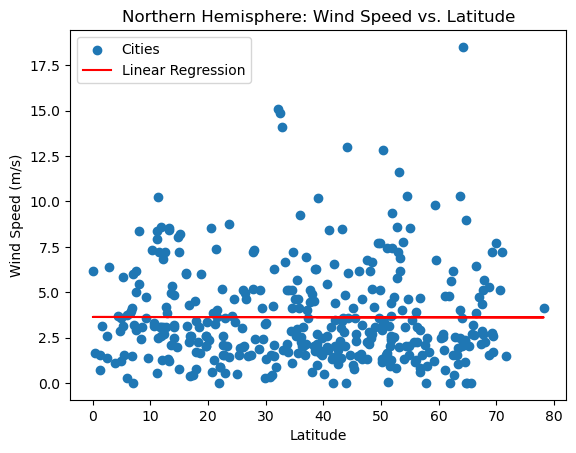

R-squared: 4.691507892639617e-06


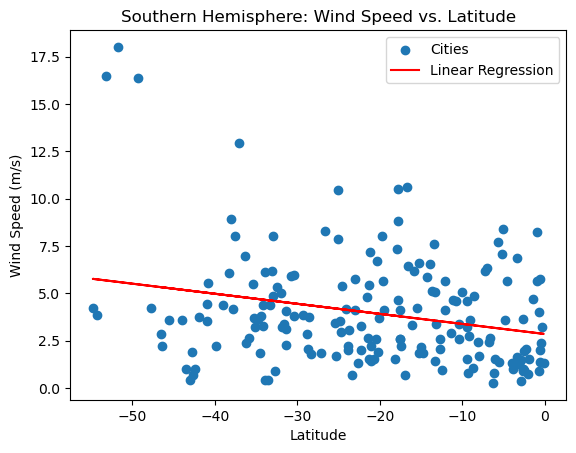

R-squared: 0.06553047110811873


In [9]:
# Generate linear regression plots for the Northern and Southern Hemispheres
northern_hemisphere = data[data["Lat"] >= 0]
southern_hemisphere = data[data["Lat"] < 0]

# Plotting and performing linear regression for the relationship between Temperature and Latitude in the Northern and Southern Hemispheres.
plot_and_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"], "Northern Hemisphere: Temperature vs. Latitude", "Latitude", "Temperature (C)")
plot_and_regression(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"], "Southern Hemisphere: Temperature vs. Latitude", "Latitude", "Temperature (C)")

# Plotting and performing linear regression for the relationship between Humidity and Latitude in the Northern and Southern Hemispheres.
plot_and_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"], "Northern Hemisphere: Humidity vs. Latitude", "Latitude", "Humidity (%)")
plot_and_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"], "Southern Hemisphere: Humidity vs. Latitude", "Latitude", "Humidity (%)")

# Plotting and performing linear regression for the relationship between Cloudiness and Latitude in the Northern and Southern Hemispheres.
plot_and_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"], "Northern Hemisphere: Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)")
plot_and_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"], "Southern Hemisphere: Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)")

# Plotting and performing linear regression for the relationship between Wind Speed and Latitude in the Northern and Southern Hemispheres.
plot_and_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"], "Northern Hemisphere: Wind Speed vs. Latitude", "Latitude", "Wind Speed (m/s)")
plot_and_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"], "Southern Hemisphere: Wind Speed vs. Latitude", "Latitude", "Wind Speed (m/s)")
